In [1]:
import netCDF4
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# OBS
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/CALIPSO/'
ncfile_obs=path+"CALIPSO_3DCloudFraction_seasonal_2008-2022_CFMIP2_sat_3.1.4_r144x90.nc"
nc_obs = netCDF4.Dataset(ncfile_obs)

ncfile_alt_mid=path+"CALIPSO_3DCloudFraction_alt_mid.nc"
nc_alt_mid = netCDF4.Dataset(ncfile_alt_mid)

In [3]:
# LMDZ6A
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_lmdz6a=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmthCOSP_3Dclcalipso_nan_r144x90.nc"
nc_lmdz6a = netCDF4.Dataset(ncfile_lmdz6a)

In [4]:
# MASK
path = '/home/jcharrel/Documents/M2_Internship_LMD/data/LMDZ6A/'
ncfile_mask=path+"LmdzOr6Actrl_SE_1980_1999_1M_histmth_phis_r144x90.nc"
nc_mask = netCDF4.Dataset(ncfile_mask)

In [5]:
# GRID
lon = nc_obs.variables['lon'][:]
lat = nc_obs.variables['lat'][:]

lat_id = (lat <= -60) 
lat = lat[lat_id]

lon_est = lon[lon<=150]
lon_peninsule = lon[(lon> 280) & (lon<=305)]
lon_ouest = lon[(lon>150) & (lon<=170) | (lon>210)&(lon<=280) | (lon>340) &(lon<=360)]
lon_ice_shelves = lon[(lon>170) & (lon <=210) | (lon>305) & (lon <=340)]

# print('Lon est :', lon_est)
# print('Lon péninsule :', lon_peninsule)
# print('Lon ouest :', lon_ouest)
# print('Lon ice shelves :', lon_ice_shelves)

lon_est_id = lon<=150
lon_peninsule_id = (lon> 280) & (lon<=305)
lon_ouest_id = (lon>150) & (lon<=170) | (lon>210)&(lon<=280) | (lon>340) &(lon<=360)
lon_ice_shelves_id = (lon>170) & (lon <=210) | (lon>305) & (lon <=340)

# print('Lon est id :', lon_est_id)
# print('Lon péninsule id :', lon_peninsule_id)
# print('Lon ouest id :', lon_ouest_id)
# print('Lon ice shelves id :', lon_ice_shelves_id)

alt_mid = nc_alt_mid.variables['alt_mid'][:] #levels

In [6]:
# ALTITUDE
g = 9.81 # m/s
alt_est_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_est_id]/g,axis=(0,2)) #m
alt_peninsule_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_peninsule_id]/g,axis=(0,2)) #m
alt_ouest_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_ouest_id]/g,axis=(0,2)) #m
alt_ice_shelves_mean = np.mean(nc_mask.variables['phis'][:,lat_id,lon_ice_shelves_id]/g,axis=(0,2)) #m

alt_data = np.dstack((alt_est_mean,alt_peninsule_mean,alt_ouest_mean,alt_ice_shelves_mean))

In [7]:
# MERIDIONAL MEAN

# VARIABLES - OBS
clobs_est_mean = np.mean(nc_obs.variables['clcalipso'][:,:,lat_id,lon_est_id], axis=3)
clobs_peninsule_mean = np.mean(nc_obs.variables['clcalipso'][:,:,lat_id,lon_peninsule_id], axis=3)
clobs_ouest_mean = np.mean(nc_obs.variables['clcalipso'][:,:,lat_id,lon_ouest_id], axis=3)
clobs_ice_shelves_mean = np.mean(nc_obs.variables['clcalipso'][:,:,lat_id,lon_ice_shelves_id], axis=3)

# VARIABLES - LMDZ6A
cllmdz6a_est_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_est_id], axis=3)
cllmdz6a_peninsule_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_peninsule_id], axis=3)
cllmdz6a_ouest_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_ouest_id], axis=3)
cllmdz6a_ice_shelves_mean = np.mean(nc_lmdz6a.variables['clcalipso'][:,:,lat_id,lon_ice_shelves_id], axis=3)

cl_data = np.ma.stack((clobs_est_mean,clobs_peninsule_mean,clobs_ouest_mean,clobs_ice_shelves_mean,cllmdz6a_est_mean,cllmdz6a_peninsule_mean,cllmdz6a_ouest_mean,cllmdz6a_ice_shelves_mean))
diff_data = np.ma.stack((cllmdz6a_est_mean-clobs_est_mean,cllmdz6a_peninsule_mean-clobs_peninsule_mean,cllmdz6a_ouest_mean-clobs_ouest_mean,cllmdz6a_ice_shelves_mean-clobs_ice_shelves_mean))

In [8]:
def plot_monthly(month) : 
    fig, axes = plt.subplots(figsize=(16,9), nrows=3, ncols=4)
    pltcounter = 0 ; altcounter = 0 ; counter=0
    
    fig.text(0.04, 0.825, 'OBS', fontsize=16, va='center', ha='center', rotation='vertical')
    fig.text(0.04, 0.5, 'LMDZ6A', fontsize=16, va='center', ha='center', rotation='vertical')
    fig.text(0.04, 0.2, 'DIFFÉRENCE \n (LMDZ6A - OBS)', fontsize=16, va='center', ha='center', rotation='vertical')
    
    months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']
    #cmin = min(np.min(cl_data[:,month,:,:]), np.min(cl_data[:,month,:,:]))*100
    #cmax = max(np.max(cl_data[:,month,:,:]), np.max(cl_data[:,month,:,:]))*100
    #clevs = np.arange(cmin,cmax+1,1)
    
    for plotid in axes.flat:
        pltcounter = pltcounter + 1
        altcounter = (pltcounter - 1) % 4 + 1
            
        if pltcounter >= 9 :
            counter = counter+1
            clplot = diff_data[counter-1,month,:,:]*100
            clevs2 = np.arange(-50,51,1)
            cmap='seismic'
            cs2 = plotid.contourf(lat, alt_mid, clplot, clevs2, cmap=cmap)
    
        else :
            clplot = cl_data[pltcounter-1,month,:,:]*100
            clevs1 = np.arange(0,61,1)
            cmap='jet'
            cs1 = plotid.contourf(lat, alt_mid, clplot, clevs1, cmap=cmap)
            
        altplot = alt_data[0,:,altcounter-1]
        plotid.plot(lat, altplot*1e-3, c='k')
        plotid.set_ylim(0,12)
        plotid.set_xlim(-81,-61)
        #plotid.contour(lat, alt_mid, clplot, levels=[10], colors='w')
        #plotid.contour(lat, alt_mid, clplot, levels=[5], linestyles=':', colors='w')
        plotid.tick_params(axis='both', labelsize=12)
        plotid.axhline(3.2, c='w',linestyle='--')
        plotid.axhline(6.5, c='w',linestyle='--')
            
        if pltcounter == 1 : 
            plotid.set_title('est', size=15)
        if pltcounter == 2 : 
            plotid.set_title('péninsule', size=15)
        if pltcounter == 3 : 
            plotid.set_title('ouest', size=15)
        if pltcounter == 4 : 
            plotid.set_title('plateformes de glace', size=15)
        if pltcounter in [9,10,11,12] :
            plotid.set_xlabel('Latitude (°N)', size=15)
        if pltcounter in [1,5]: 
            plotid.set_ylabel('Altitude (km)', size=15)
            
    #fig.suptitle('{}'.format(months[month]), fontsize=18)
    fig.tight_layout()
    fig.subplots_adjust(right=0.89, left=0.1, wspace=0.2)
    cbar_ax = fig.add_axes([0.9, 0.38, 0.008, 0.58])
    cbar_ax2 = fig.add_axes([0.9, 0.065, 0.008, 0.27])
    cb1 = fig.colorbar(cs1, cax=cbar_ax, ticks=np.arange(0,61,5), label='Cloud fraction (%)')
    cb2 = fig.colorbar(cs2, cax=cbar_ax2, ticks=np.arange(-50,51,10), label='Cloud fraction difference (%)')
    cb1.ax.tick_params(labelsize=12)
    cb2.ax.tick_params(labelsize=12)
    cb1.set_label('Couverture nuageuse (%)', fontsize=14)
    cb2.set_label('Différence (%)', fontsize=14)
    path_fig = '/home/jcharrel/Documents/M2_Internship_LMD/figures/3DCloudFraction/sections/monthly/'
    fig.savefig(path_fig+'3DCloudFraction_sections_monthly_obs_lmdz6a_diff_'+months[month]+'.png',dpi=300)

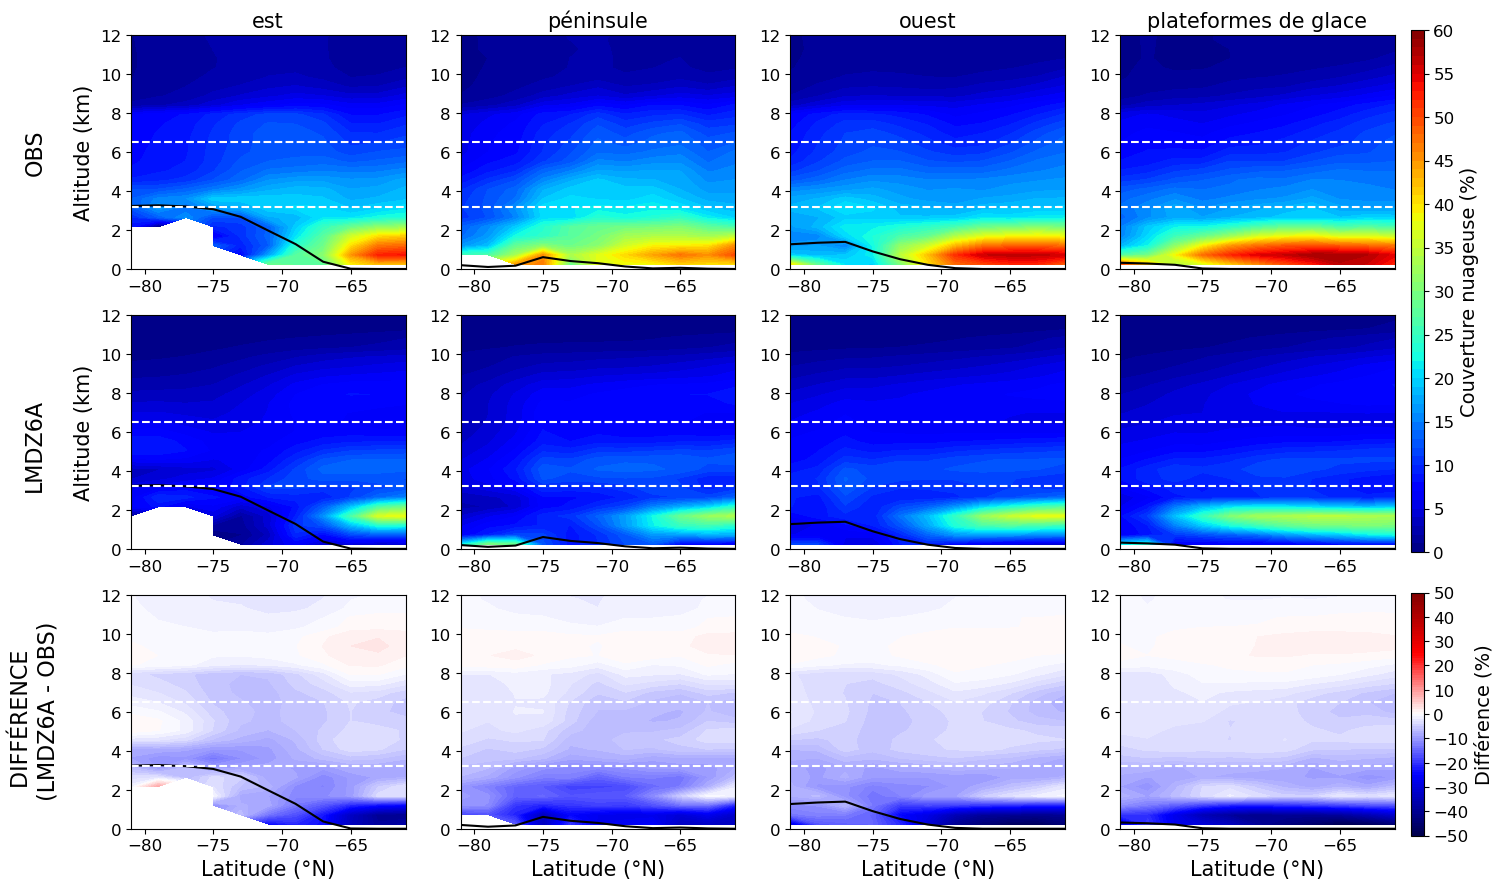

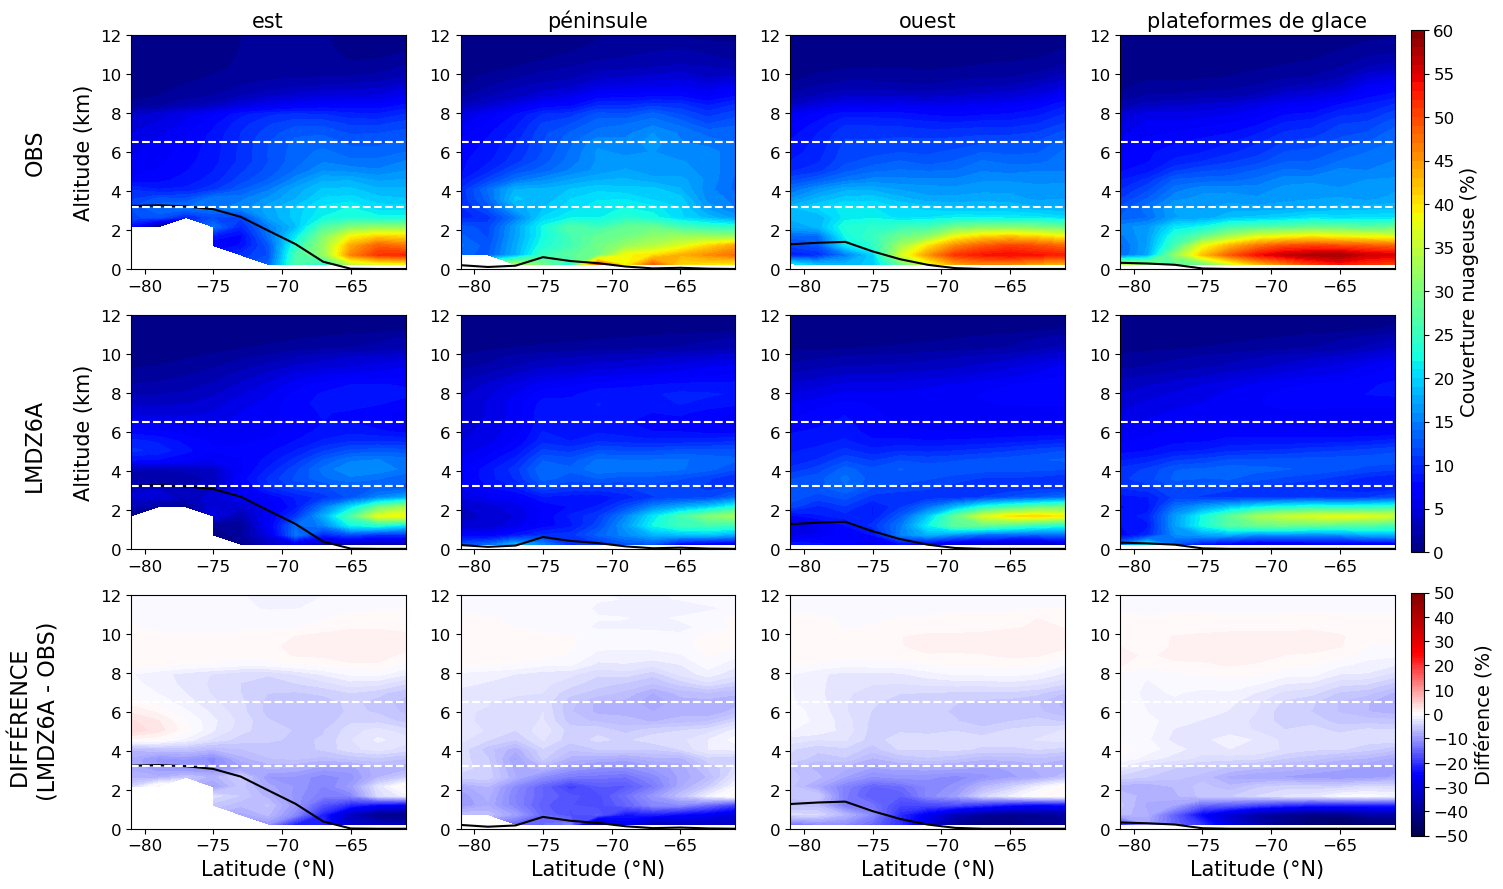

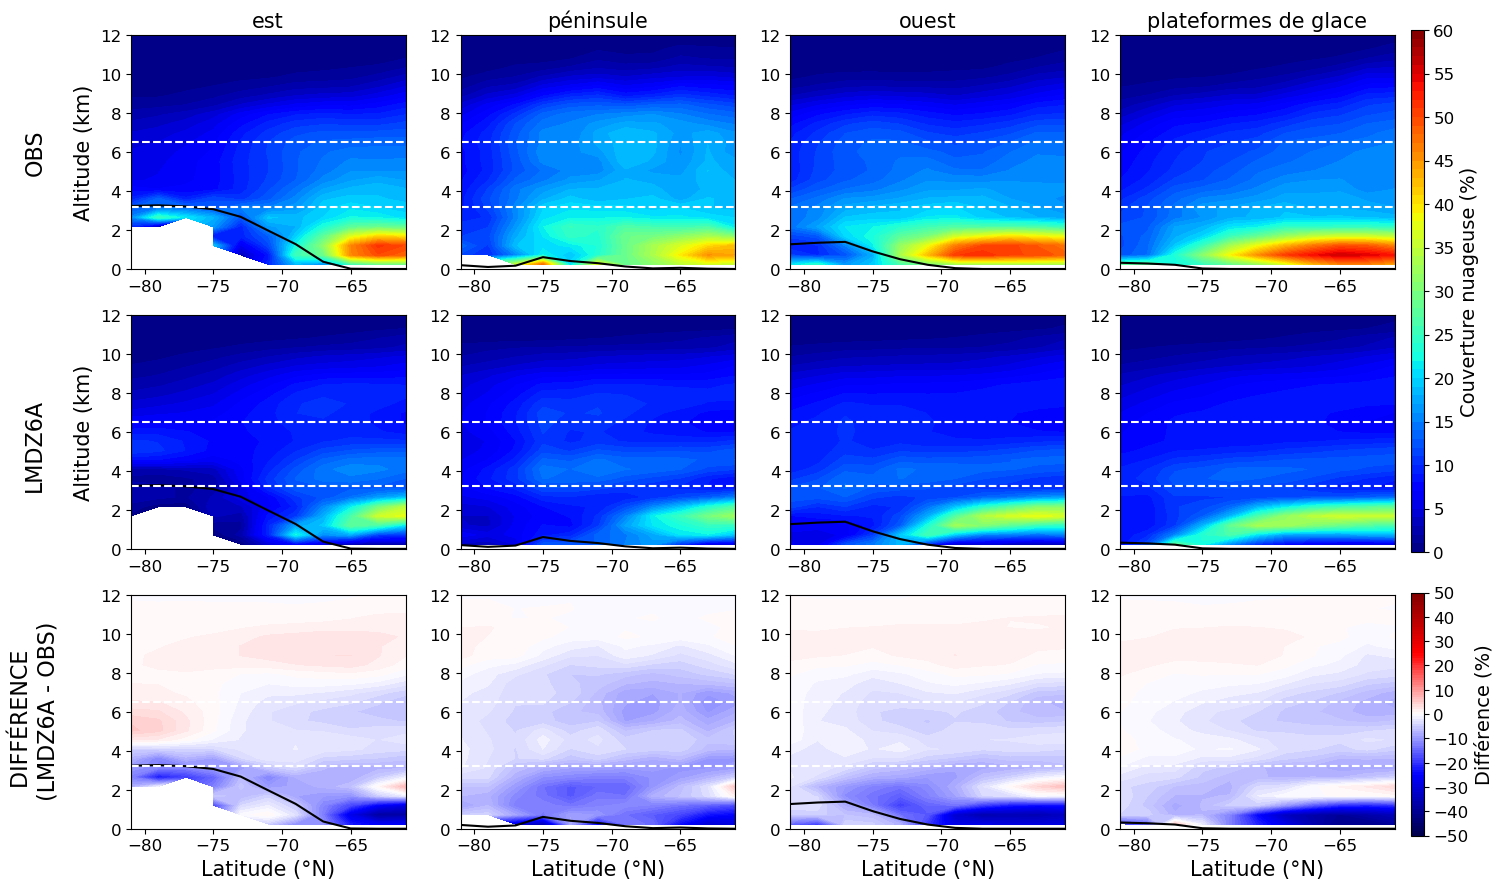

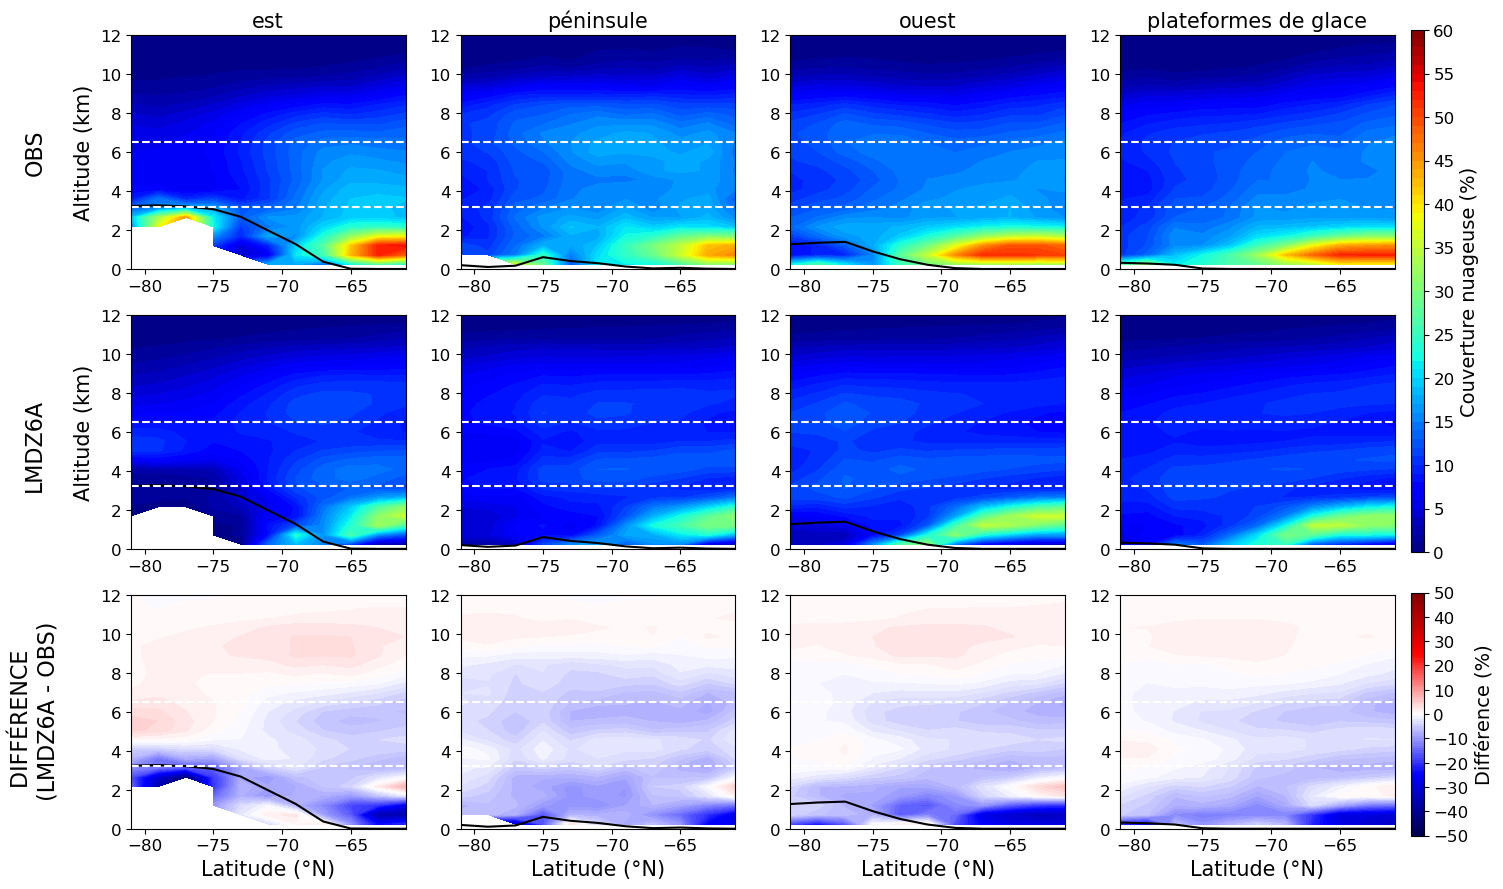

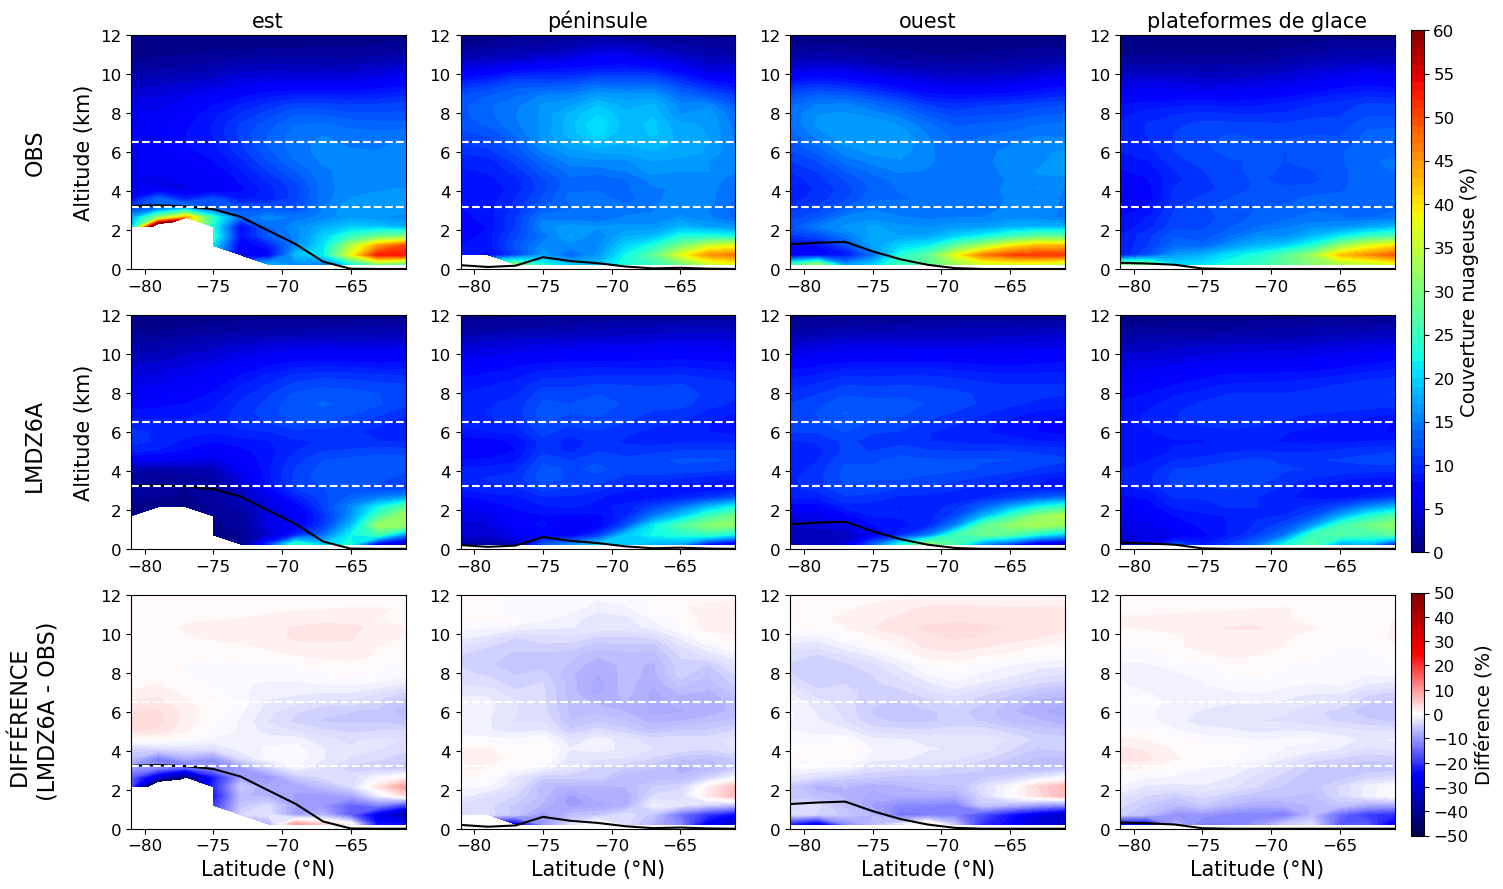

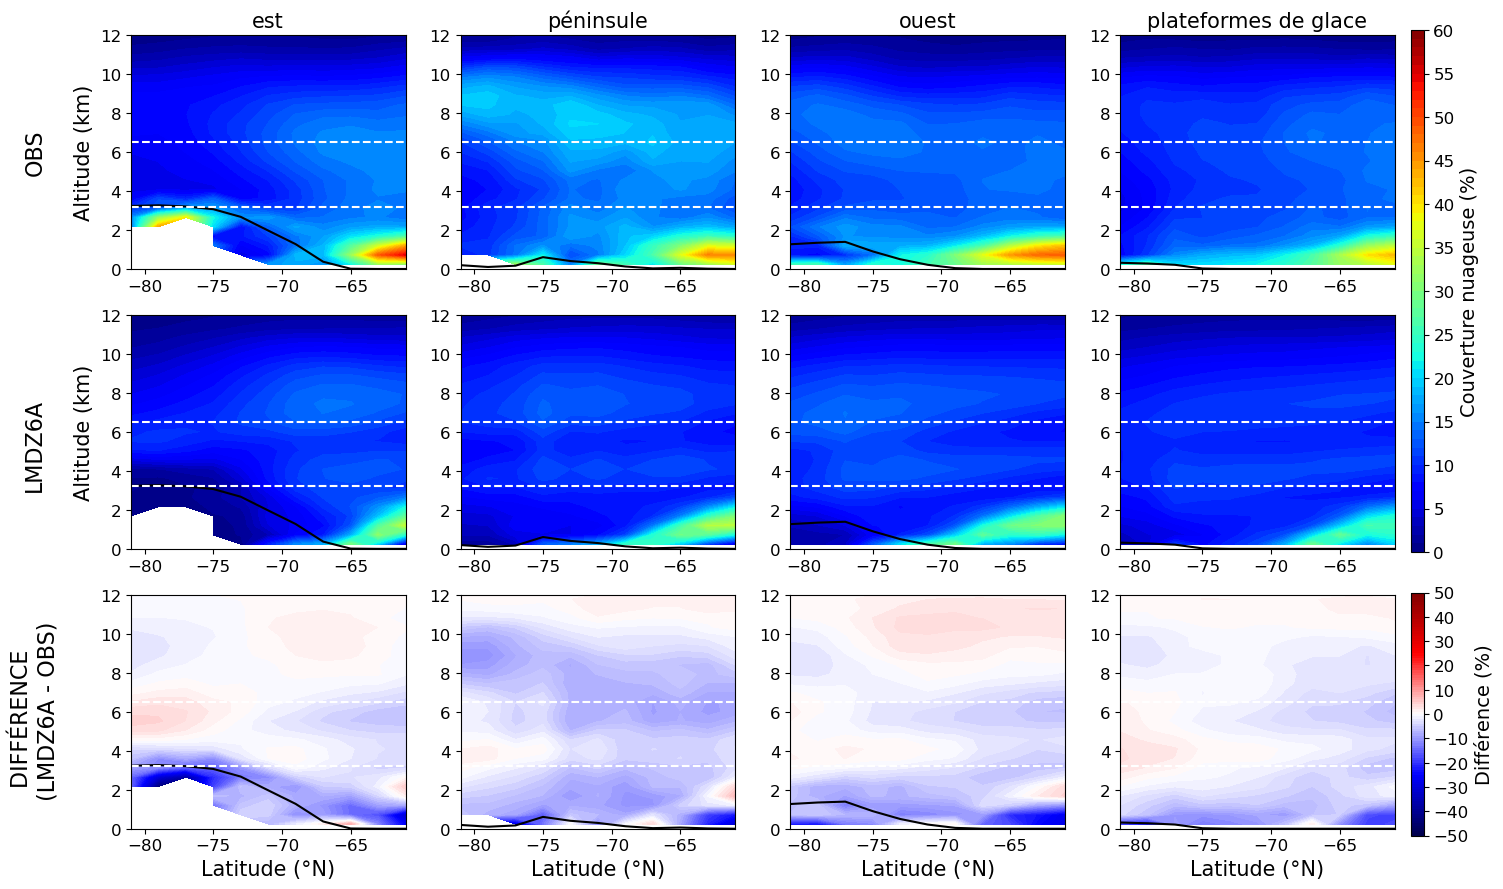

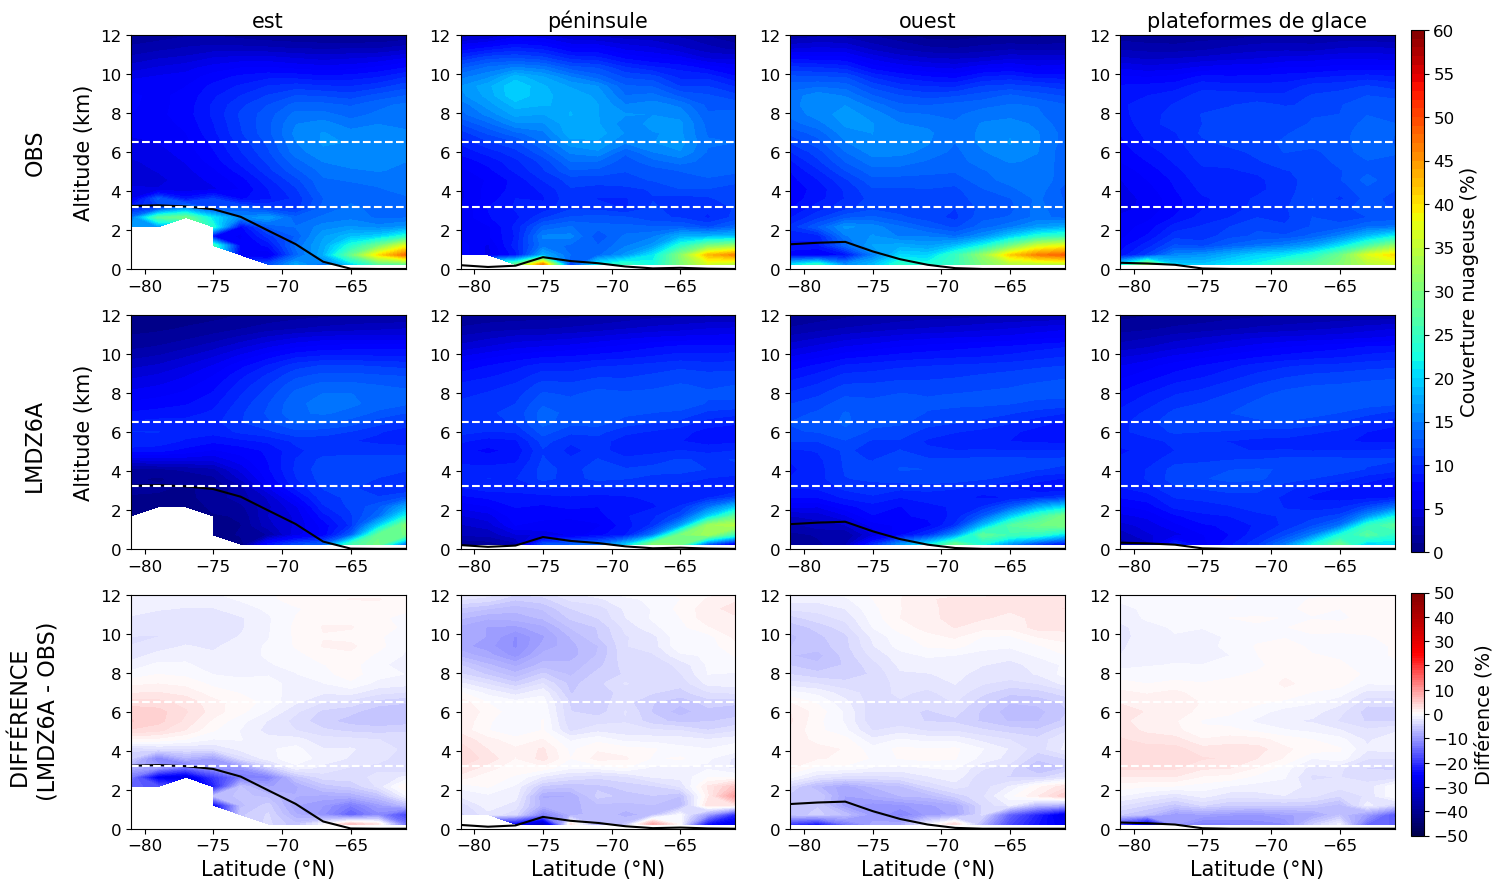

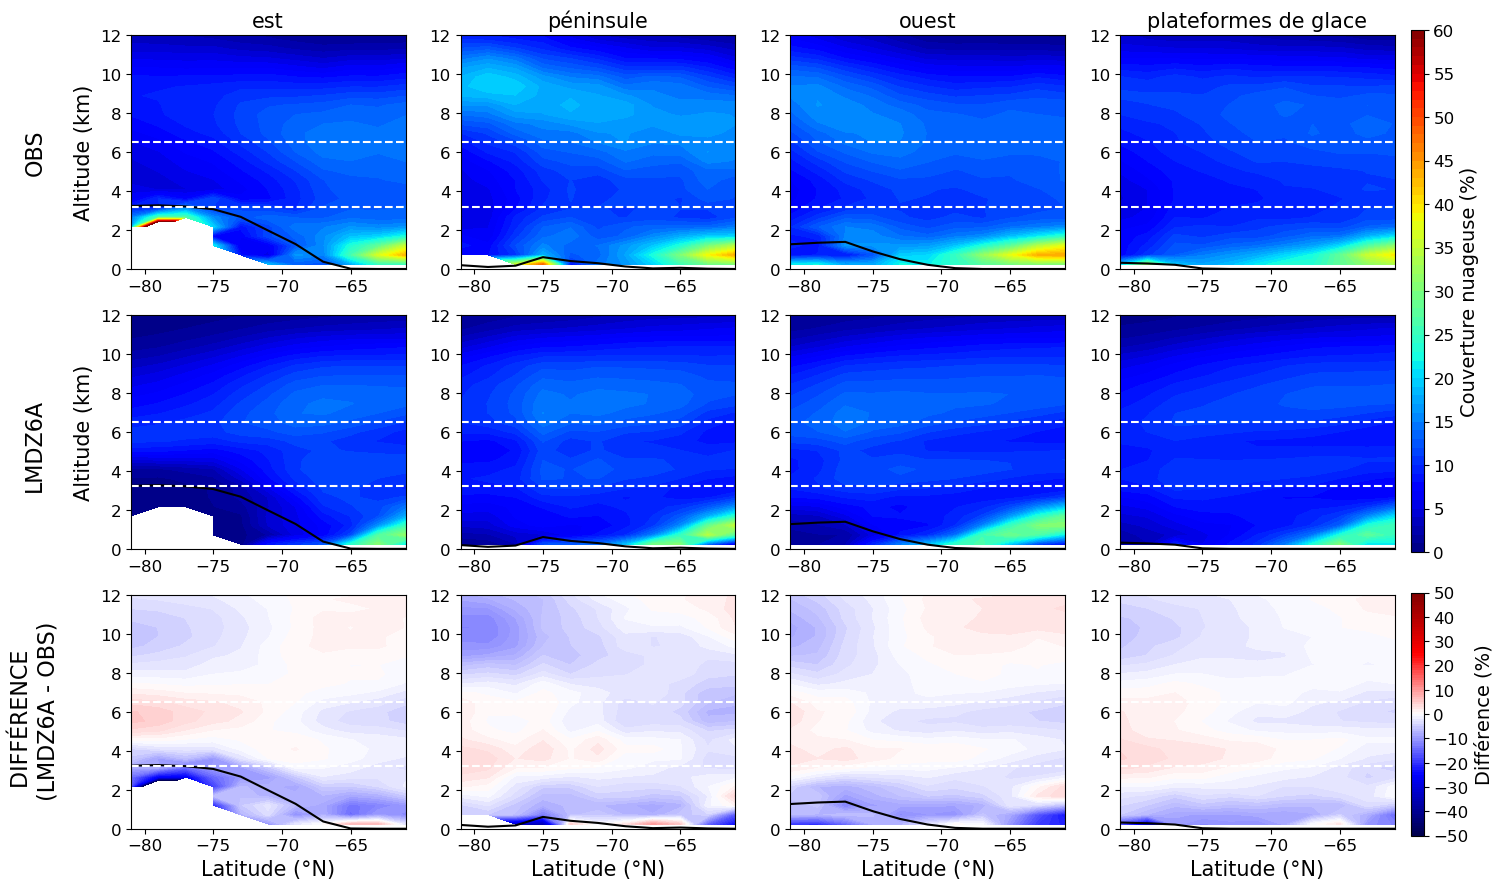

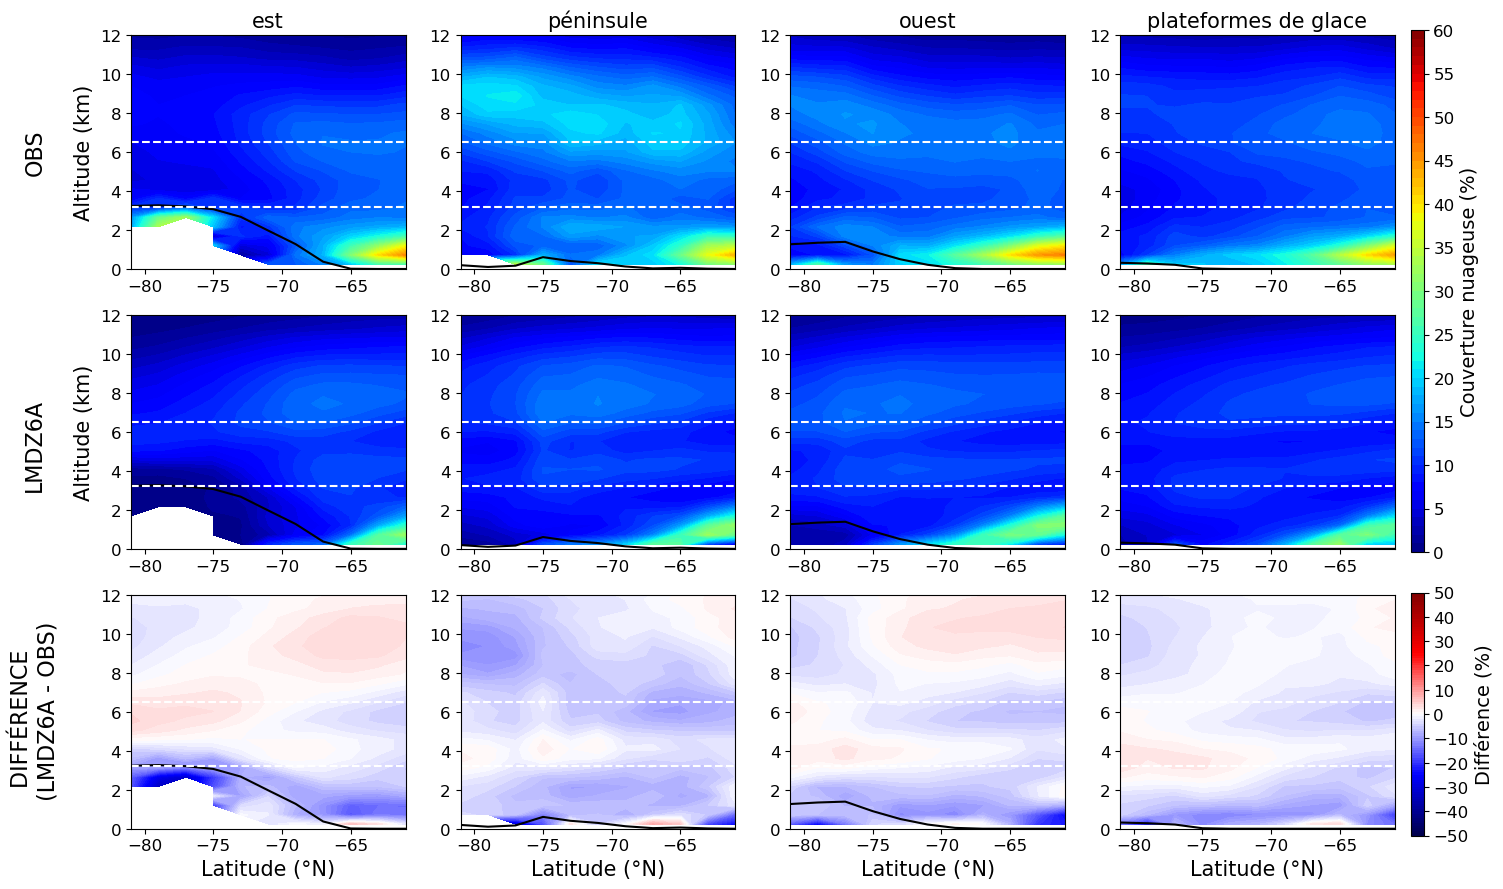

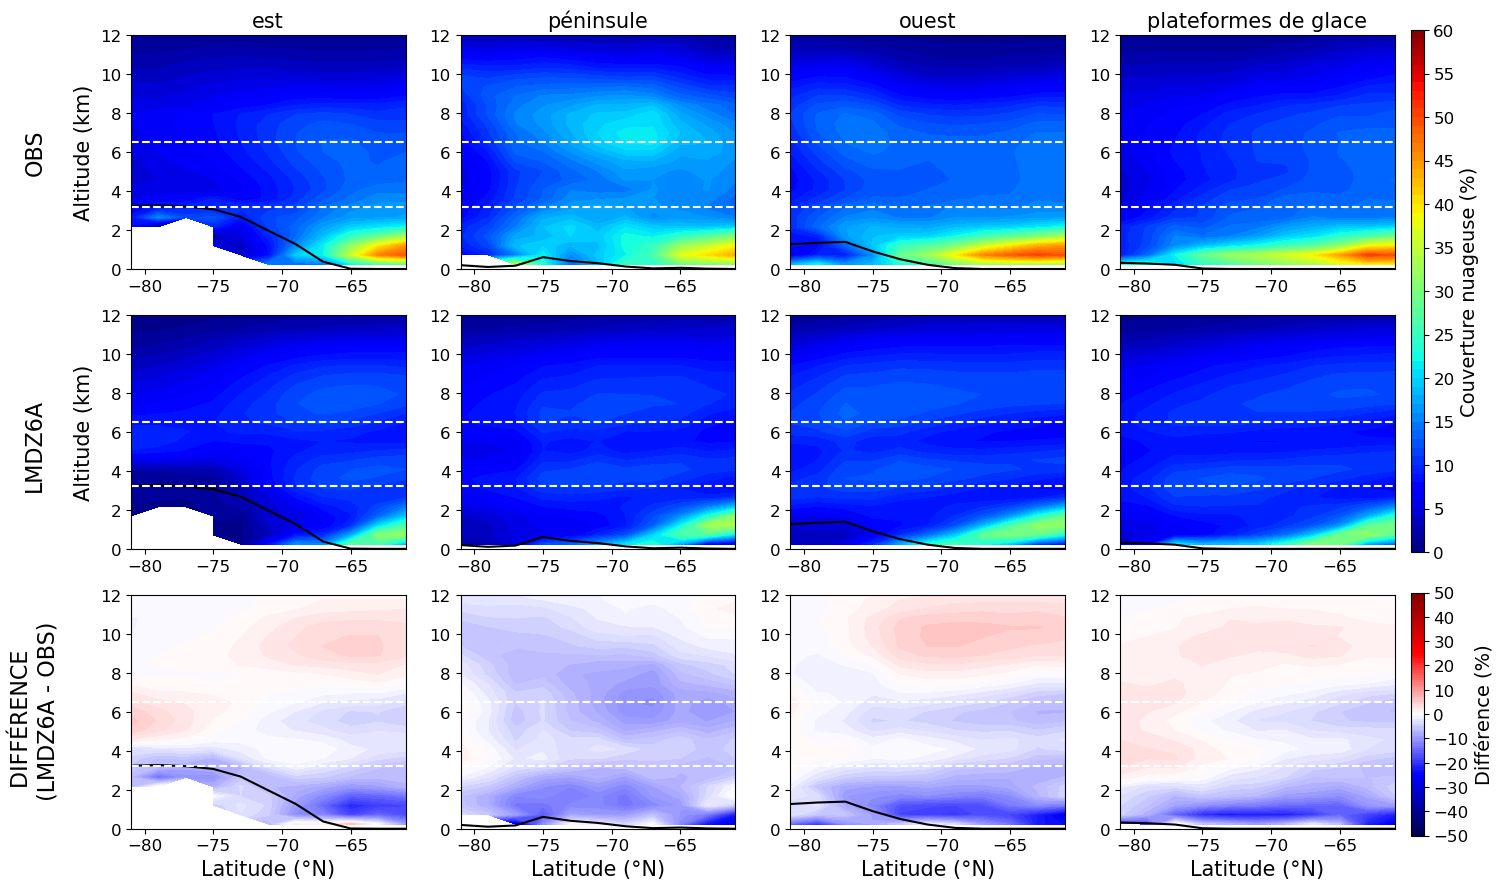

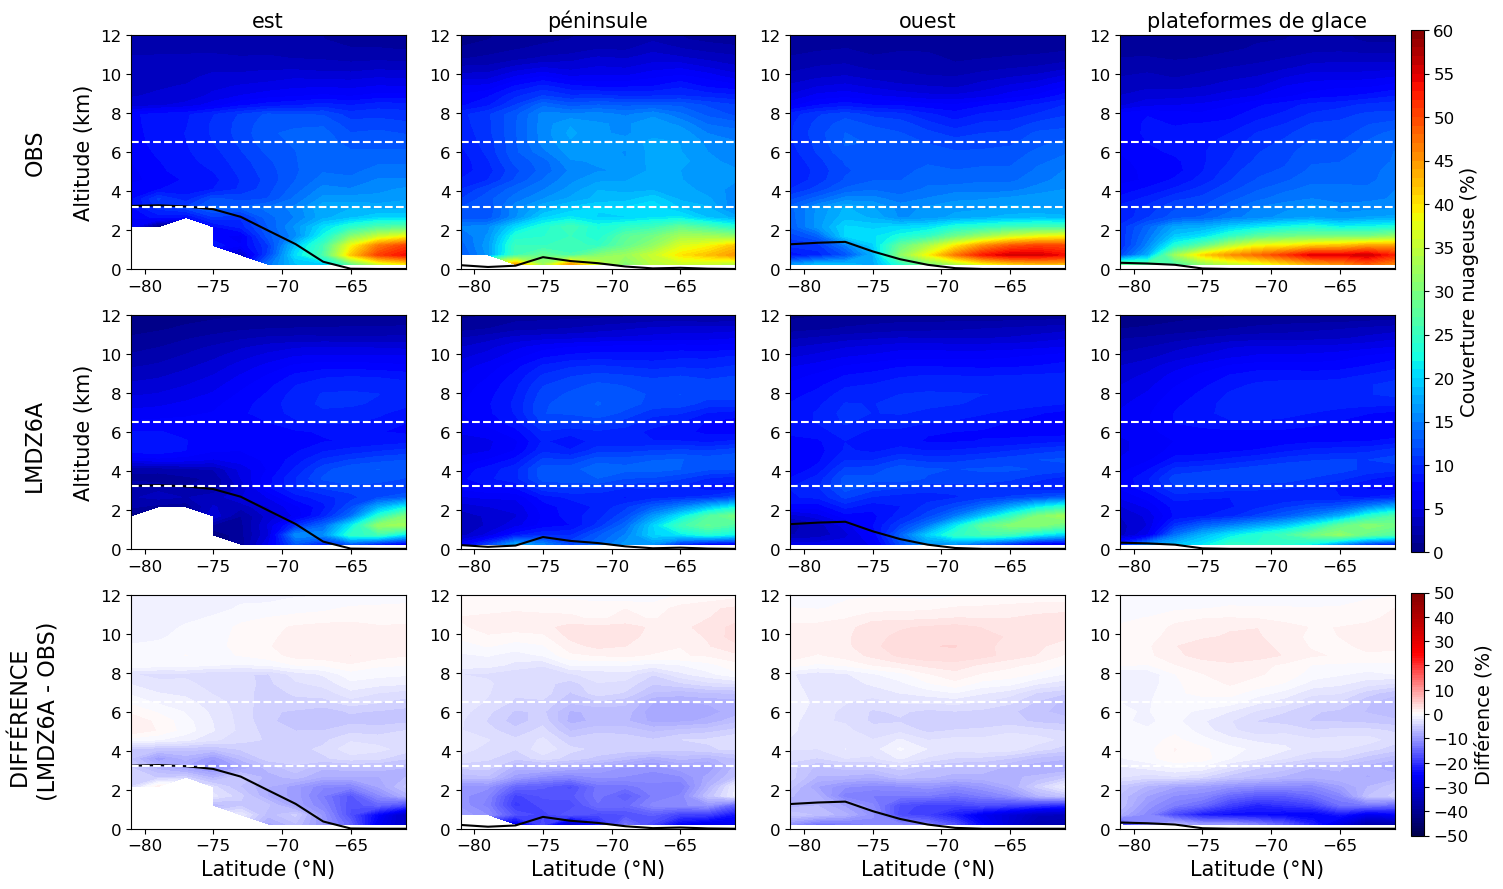

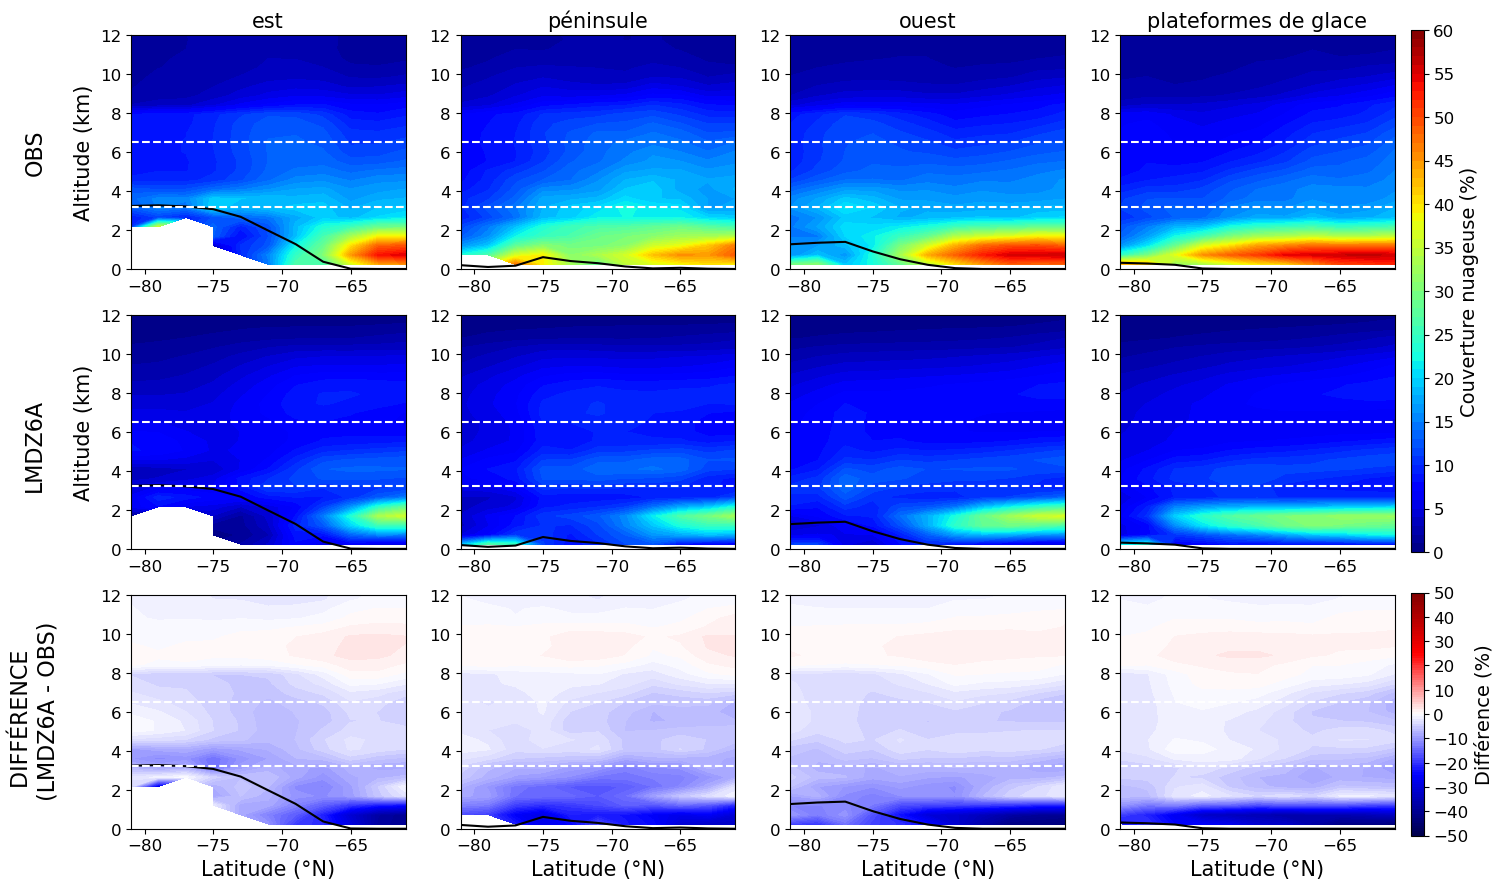

In [9]:
plot_monthly(0)
plot_monthly(1)
plot_monthly(2)
plot_monthly(3)
plot_monthly(4)
plot_monthly(5)
plot_monthly(6)
plot_monthly(7)
plot_monthly(8)
plot_monthly(9)
plot_monthly(10)
plot_monthly(11)